<a href="https://colab.research.google.com/github/9C0c0/H-C-M-Y-X-L-NH/blob/main/Baitaplamthem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nhập tên file ảnh (vd: fruit.jpg): pagoda.jpg

Chọn thao tác:
1. Tịnh tiến
2. Xoay
3. Zoom
4. Làm mờ Gaussian
5. Sóng sin
Chọn số: 4
Nhập sigma: 45


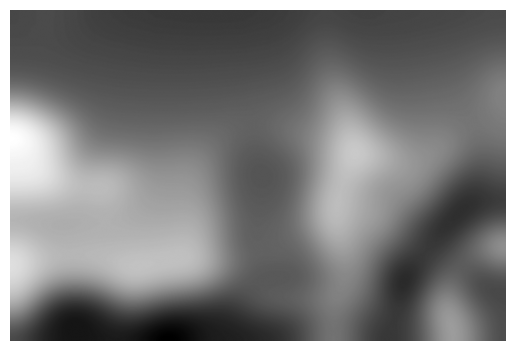

In [31]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def show_and_save(result, name):
    plt.imshow(result, cmap='gray')
    plt.axis('off')
    plt.show()
    iio.imwrite(name, result)

img_name = input("Nhập tên file ảnh (vd: fruit.jpg): ")
img = iio.imread(img_name, mode="L")

print("\nChọn thao tác:\n1. Tịnh tiến\n2. Xoay\n3. Zoom\n4. Làm mờ Gaussian\n5. Sóng sin")
choice = input("Chọn số: ")

if choice == "1":
    dx = int(input("Số pixel theo X: "))
    dy = int(input("Số pixel theo Y: "))
    result = nd.shift(img, (dy, dx))
    show_and_save(result, 'translated.jpg')

elif choice == "2":
    angle = float(input("Góc xoay: "))
    reshape = input("Reshape (True/False): ") == "True"
    result = nd.rotate(img, angle, reshape=reshape)
    show_and_save(result, 'rotated.jpg')

elif choice == "3":
    factor = float(input("Hệ số zoom: "))
    result = nd.zoom(img, factor)
    show_and_save(result, 'zoomed.jpg')

elif choice == "4":
    sigma = float(input("Nhập sigma: "))
    result = nd.gaussian_filter(img, sigma=sigma)
    show_and_save(result, 'blurred.jpg')

elif choice == "5":
    amp = float(input("Biên độ sóng: "))
    V, H = img.shape
    M = np.indices((V, H))
    wave = amp * np.sin(M[1] / 20.0)
    coords = [M[0] + wave, M[1]]
    result = nd.map_coordinates(img, coords)
    show_and_save(result, 'wave.jpg')

else:
    print("Lựa chọn không hợp lệ.")


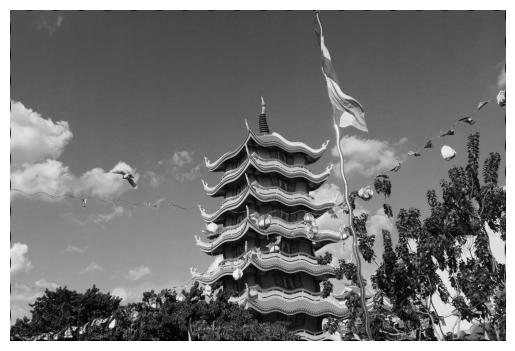

In [28]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def warp(coord):
    a = coord[0] + 20 * np.sin(coord[1] / 50)
    b = coord[1] + 10 * np.sin(coord[0] / 50)
    return a, b

data = iio.imread('pagoda.jpg', mode="L")
zoomed = nd.zoom(data, 5)
warped = nd.geometric_transform(zoomed, warp)

plt.imshow(warped, cmap='gray')
plt.axis('off')
plt.show()

iio.imwrite('pagoda_warped.jpg', warped)


In [26]:
from PIL import Image, ImageOps

mountain = Image.open('mountain.jpg').convert('RGBA')
boat = Image.open('boat.jpg').convert('RGBA')
mountain_rot = mountain.rotate(45, expand=False)
boat_rot = boat.rotate(45, expand=False)
mountain_mirror = ImageOps.flip(mountain_rot)
boat_mirror = ImageOps.flip(boat_rot)
w, h = mountain_mirror.size
canvas = Image.new('RGBA', (w * 2, h), 'WHITE')
canvas.paste(mountain_mirror, (0, 0), mountain_mirror)
canvas.paste(boat_mirror, (w, 0), boat_mirror)

canvas.convert('RGB').save('mountain_boat_mirror.jpg')


In [14]:
from PIL import Image
import numpy as np

papaya = Image.open('papaya.jpg').convert('RGBA')
watermelon = Image.open('watermelon2.jpg').convert('RGBA')
def apply_gradient(img, start_color, end_color):
    w, h = img.size
    arr = np.array(img)
    gradient = np.linspace(start_color, end_color, h).astype(np.uint8)
    for y in range(h):
        arr[y, :, :3] = gradient[y]
    return Image.fromarray(arr)
papaya_grad = apply_gradient(papaya, [255, 0, 0], [0, 255, 0])
watermelon_grad = apply_gradient(watermelon, [255, 255, 0], [128, 0, 128])

canvas = Image.new('RGBA', (papaya.width + watermelon.width, max(papaya.height, watermelon.height)), (0, 0, 0, 0))
canvas.paste(papaya_grad, (0, 0), papaya_grad)
canvas.paste(watermelon_grad, (papaya.width, 0), watermelon_grad)

canvas.save('fruit_combined.png')


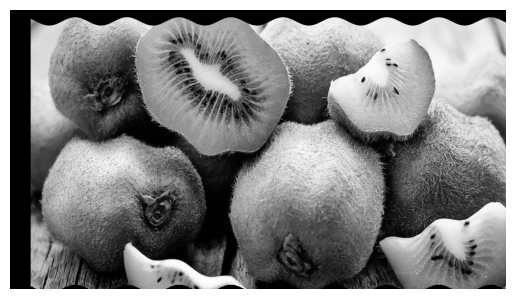

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd


data = iio.imread('kiwi.jpg', mode="L")
translated = nd.shift(data, (30, 50))
V, H = translated.shape
M = np.indices((V, H))
amp = 10
wave = amp * np.sin(M[1] / 20.0)
map_y = M[0] + wave
map_x = M[1]
coords = [map_y, map_x]
wave_img = nd.map_coordinates(translated, coords)
plt.imshow(wave_img, cmap='gray')
plt.axis('off')
plt.show()
iio.imwrite('kiwi_wave.jpg', wave_img)


In [27]:
from google.colab import files
uploaded = files.upload()


Saving pagoda.jpg to pagoda.jpg
